In [83]:
import torch
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
py.init_notebook_mode(connected=True)

In [84]:
data_origin = pd.read_csv('data_to_learn.soap.2.csv')

In [85]:
data_origin = data_origin[data_origin.nGB != 28]

In [86]:
data_origin

,nGB,nRandom,BindingEnergy,id,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.001107,57648,15.747378,-123.814835,677.237366,973.502625,-5324.825195,29125.513672,...,1.160872e-01,0.128434,-5.320710,413.886108,1.341505e-04,-7.225690e-02,1.202637e-01,39.077339,-64.802986,108.057190
1,1,2,0.003313,51853,37.544209,-406.083588,1555.432495,4392.258789,-16823.783203,64440.570312,...,4.134579e-01,33.014473,-57.038757,98.545280,6.567274e-05,-2.486578e-02,4.886756e-02,9.415000,-18.502832,36.362759
2,1,3,0.000967,60668,30.601122,-320.180634,1333.779297,3350.061523,-13955.380859,58134.054688,...,1.159822e+00,88.887352,-161.147385,292.165497,1.336527e-04,-5.078869e-02,1.071474e-01,19.305197,-40.727356,85.930969
3,1,4,-0.008195,10034,19.874336,-160.825485,617.126343,1301.418945,-4993.859375,19162.648438,...,7.416296e-03,5.042591,1.004576,10.825282,1.844960e-04,-3.010439e-02,2.530037e-01,13.856663,-68.652847,457.655182
4,1,5,0.005728,21910,48.489777,-542.052429,1882.268188,6059.438965,-21041.302734,73065.578125,...,1.225451e-07,0.000009,-0.000007,0.000035,8.405078e-11,-9.872736e-09,7.224937e-08,0.000016,-0.000052,0.000195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,27,996,-0.000262,94831,24.422493,-243.598495,1116.337646,2429.736816,-11134.742188,51027.128906,...,1.857032e+00,128.676086,-263.898407,541.404419,1.056161e-04,-4.047679e-02,1.108194e-01,15.612189,-42.790535,117.698929
26996,27,997,0.000748,87902,11.634219,-83.059372,566.909851,592.979980,-4047.299805,27624.265625,...,2.405678e-01,26.656660,-30.500658,408.323151,2.827807e-04,-1.177588e-01,1.612694e-01,51.855003,-67.471909,107.430534
26997,27,998,0.002400,34201,44.033562,-486.546387,1751.448608,5376.067383,-19352.533203,69664.414062,...,5.439792e-03,0.456702,-0.771308,1.307729,2.760564e-06,-9.514219e-04,1.657234e-03,0.329548,-0.575496,1.009439
26998,27,999,0.144771,62641,47.909721,-536.205688,1849.638306,6001.215820,-20701.156250,71408.515625,...,-7.529541e-03,1.173357,-0.696920,0.495733,6.285232e-05,4.738858e-03,-6.615375e-03,0.557185,-0.883195,2.021357


In [92]:
#random shuffle
data = data_origin.sample(frac=1, random_state=1)
#split data
Y_all = data['BindingEnergy'].to_numpy()
Y_train = Y_all[0:int(len(data)*.7)]
Y_temp = Y_all[int(len(data)*.7):]
Y_cos = Y_temp[:int(len(Y_temp)*.5)]
Y_test = Y_temp[int(len(Y_temp)*.5):]

X_all = data.iloc[:, 4:].to_numpy()
X_train = X_all[:int(len(X_all)*.7)]

#normalization
X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)

X_train = (X_train - X_mean) / X_std

X_temp = X_all[int(len(X_all)*.7):]
X_temp = (X_temp - X_mean) / X_std
X_cos = X_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]   

In [93]:
(N, D_in) = X_train.shape
H = 100
D_out = 1

X_train = torch.from_numpy(X_train)
X_train = X_train.float()
y = torch.from_numpy(Y_train)
y = y.float()
y = y.view(y.shape[0],1)
model1 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 80),
    torch.nn.ReLU(),
    torch.nn.Linear(80, 70),
    torch.nn.ReLU(),
    torch.nn.Linear(70, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, D_out)
)

loss_fn1 = torch.nn.MSELoss(reduction='sum')
learning_rate = 2e-6
optimizer1 = torch.optim.SGD(model1.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 0.2)#0.2

In [94]:
def WMSELoss(yhat,y):
    return torch.sum(((yhat-y) / y)**2)

In [95]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1.to(device)
X_train = X_train.to(device)
y = y.to(device)

In [96]:
for t in range(100001):
    y_pred = model1(X_train)
    
    loss = loss_fn1(y_pred, y)
    if t%500 == 0:
        print(t, loss.item())
    
    optimizer1.zero_grad()
    
    loss.backward()
    
    optimizer1.step()

0 2317.619140625
500 692.6192016601562
1000 738.5819091796875
1500 522.0830078125
2000 474.981689453125
2500 484.851318359375
3000 929.5193481445312
3500 614.5284423828125
4000 463.5274658203125
4500 378.73748779296875
5000 329.6170654296875
5500 629.5880737304688
6000 467.0745849609375
6500 379.19512939453125
7000 767.5968017578125
7500 283.1667175292969
8000 280.8983154296875
8500 302.3833312988281
9000 578.3671875
9500 417.36712646484375
10000 352.9114685058594
10500 391.5069885253906
11000 282.1264953613281
11500 263.13818359375
12000 335.5365295410156
12500 203.88706970214844
13000 228.55218505859375
13500 472.9311828613281
14000 186.8095703125
14500 151.3058319091797
15000 148.39654541015625
15500 138.1580352783203
16000 144.22348022460938
16500 130.2831573486328
17000 109.94766235351562
17500 240.9048614501953
18000 137.42715454101562
18500 166.34600830078125
19000 99.31266021728516
19500 116.93742370605469
20000 98.93801879882812
20500 103.18372344970703
21000 88.1266098022461


In [97]:
for t in range(100001):
    y_pred = model1(X_train)
    
    loss = loss_fn1(y_pred, y)
    if t%500 == 0:
        print(t, loss.item())
    
    optimizer1.zero_grad()
    
    loss.backward()
    
    optimizer1.step()

0 26.489267349243164
500 21.143810272216797
1000 19.269424438476562
1500 24.41547393798828
2000 25.80733871459961
2500 22.03764533996582
3000 25.752521514892578
3500 18.984296798706055
4000 21.475996017456055
4500 18.861690521240234
5000 22.947542190551758
5500 21.969966888427734
6000 17.2969913482666
6500 17.14961051940918
7000 23.17849349975586
7500 25.113664627075195
8000 30.12498664855957
8500 19.999744415283203
9000 17.316143035888672
9500 28.206222534179688
10000 23.522655487060547
10500 18.36965560913086
11000 18.872512817382812
11500 18.781208038330078
12000 40.40653991699219
12500 17.871280670166016
13000 17.123746871948242
13500 17.14517593383789
14000 16.55035400390625
14500 20.258405685424805
15000 25.316190719604492
15500 16.79025650024414
16000 23.248903274536133
16500 25.107154846191406
17000 21.44080352783203
17500 23.043745040893555
18000 18.24490737915039
18500 23.64811897277832
19000 17.856569290161133
19500 18.43770408630371
20000 22.31407928466797
20500 111.5185012

In [98]:
for t in range(100001):
    y_pred = model1(X_train)
    
    loss = loss_fn1(y_pred, y)
    if t%500 == 0:
        print(t, loss.item())
    
    optimizer1.zero_grad()
    
    loss.backward()
    
    optimizer1.step()

0 15.565275192260742
500 15.652660369873047
1000 19.55007553100586
1500 16.37278175354004
2000 18.47620964050293
2500 17.512590408325195
3000 15.281270027160645
3500 15.146785736083984
4000 16.54450798034668
4500 14.976408004760742
5000 16.475135803222656
5500 23.63439178466797
6000 15.016700744628906
6500 25.183975219726562
7000 44.80347442626953
7500 38.392765045166016
8000 32.25177001953125
8500 15.465989112854004
9000 15.006357192993164
9500 14.871450424194336
10000 14.583391189575195
10500 14.468286514282227
11000 14.423748016357422
11500 14.719182014465332
12000 16.99886703491211
12500 14.136693000793457
13000 17.524829864501953
13500 16.155170440673828
14000 20.603103637695312
14500 14.972875595092773
15000 14.211915969848633
15500 15.671137809753418
16000 18.452272415161133
16500 16.1240234375
17000 36.72551727294922
17500 14.592972755432129
18000 14.180915832519531
18500 20.419231414794922
19000 16.58306121826172
19500 16.887540817260742
20000 18.08869743347168
20500 13.992959

In [99]:
for t in range(100001):
    y_pred = model1(X_train)
    
    loss = loss_fn1(y_pred, y)
    if t%500 == 0:
        print(t, loss.item())
    
    optimizer1.zero_grad()
    
    loss.backward()
    
    optimizer1.step()

0 24.462196350097656
500 11.826595306396484
1000 15.148309707641602
1500 11.434581756591797
2000 13.274137496948242
2500 11.490468978881836
3000 12.963507652282715
3500 15.403151512145996
4000 52.773170471191406
4500 12.631976127624512
5000 14.8289155960083
5500 11.548694610595703
6000 11.267677307128906
6500 11.409683227539062
7000 19.847858428955078
7500 15.48357105255127
8000 15.205147743225098
8500 12.271281242370605
9000 12.580360412597656
9500 11.425960540771484
10000 11.435487747192383
10500 14.616950988769531
11000 16.02829360961914
11500 15.300275802612305
12000 12.66733455657959
12500 10.997722625732422
13000 13.64436149597168
13500 11.304143905639648
14000 11.10252571105957
14500 13.018322944641113
15000 14.695638656616211
15500 17.90342140197754
16000 14.364425659179688
16500 17.03314208984375
17000 11.095355033874512
17500 10.332671165466309
18000 22.411231994628906
18500 11.02933406829834
19000 10.52707290649414
19500 12.092936515808105
20000 15.686756134033203
20500 16.1

## Training

In [75]:
y_train_pred = y_pred.detach().cpu().numpy()
Y_mean = np.mean(Y_train)
SS_tot = torch.sum(torch.pow(y - Y_mean, 2))
SS_res = torch.sum(torch.pow(y_pred - y, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

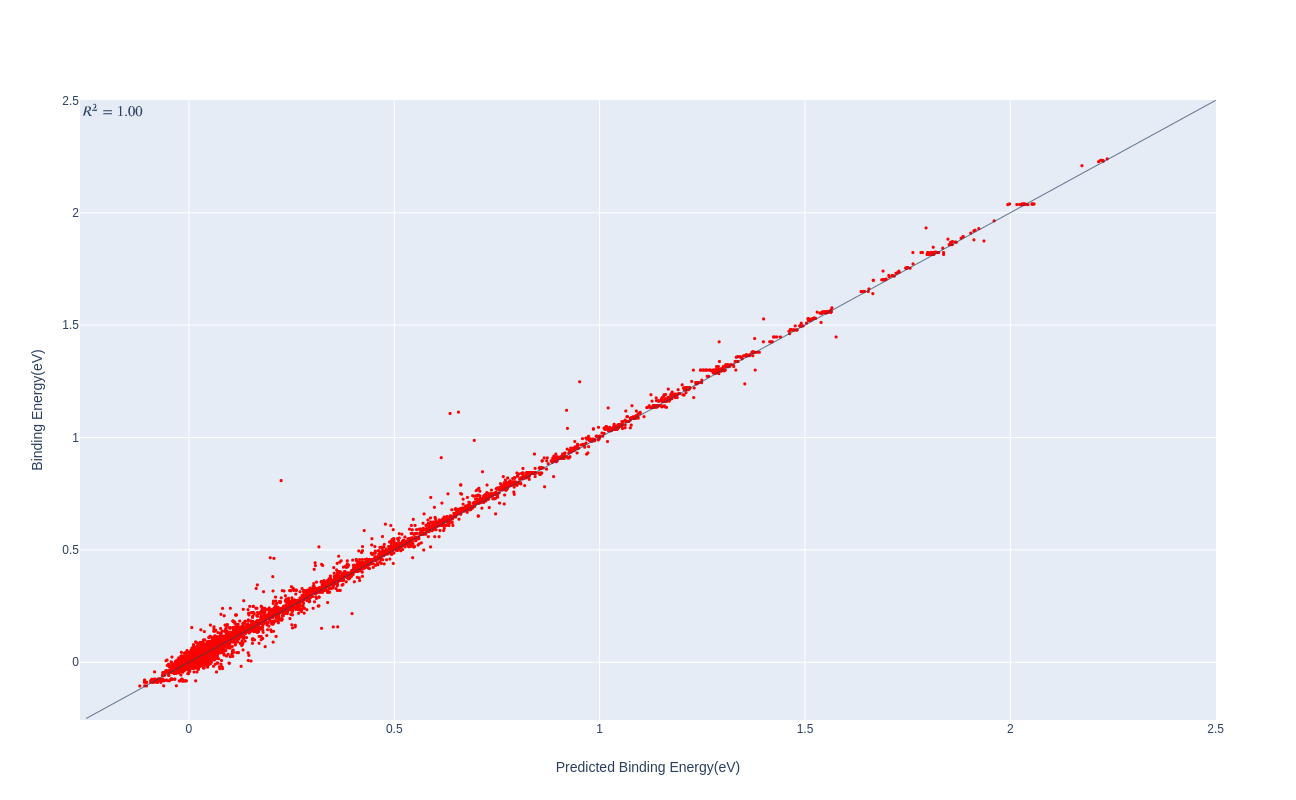

In [76]:
#draw correlation
main = go.Scatter(x = y_train_pred.squeeze(), 
          y = Y_train, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Binding Energy(eV)", 'zeroline':False},
           yaxis = {'title':'Binding Energy(eV)', 'zeroline':False},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 12)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':2.5,
                            'y0':-0.25,
                            'y1':2.5,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

## Cross Validation

In [78]:
#X_cos = torch.from_numpy(X_cos)
X_cos = X_cos.float()
X_cos = X_cos.to(device)
Y_cos_pred = model1(X_cos)
Y_cos_pred = Y_cos_pred.detach().cpu()
Y_cos_pred = Y_cos_pred.numpy()
Y_cos_pred = Y_cos_pred.squeeze()
Y_cos = Y_cos.squeeze()
Y_mean = np.mean(Y_cos)
SS_tot = np.sum(np.power(Y_cos - Y_mean, 2))
SS_res = np.sum(np.power(Y_cos_pred - Y_cos, 2))
R_squared = 1-SS_res/SS_tot

In [79]:
R_squared


0.7742292320138604

In [80]:
Y_cos_pred

array([0.00778407, 0.07496995, 0.03852898, ..., 0.00497973, 0.15533862,
       0.00202662], dtype=float32)

In [81]:
Y_cos

array([0.00115497, 0.10313949, 0.06103425, ..., 0.00809597, 0.13536568,
       0.00155908])

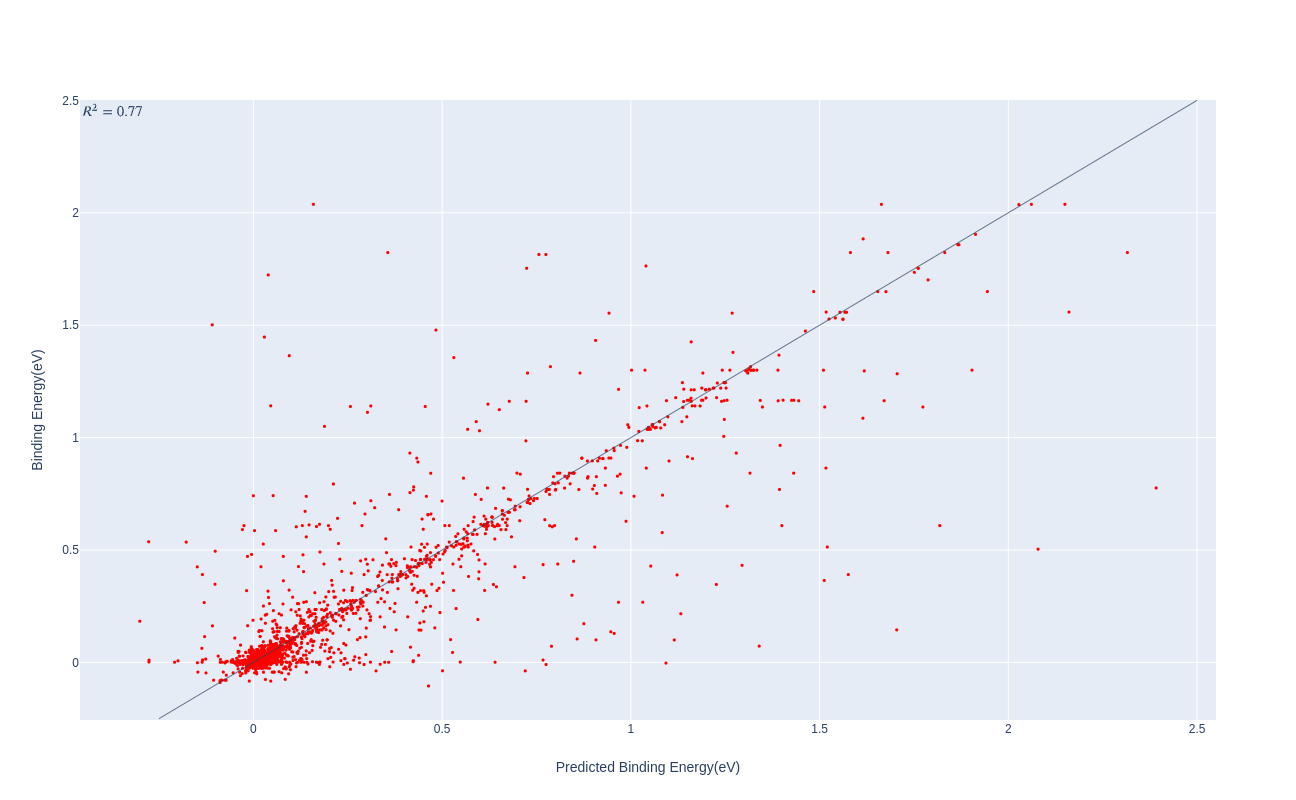

In [82]:
#draw correlation
main = go.Scatter(x = Y_cos_pred, 
          y = Y_cos, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Binding Energy(eV)", 'zeroline':False},
           yaxis = {'title':'Binding Energy(eV)', 'zeroline':False},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 12)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':2.5,
                            'y0':-0.25,
                            'y1':2.5,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))